## Calories Burned Predictor
#### 1. EDA 

In [2]:
#Importing Libraries for Data Preprocessing
import pandas as pd 
import numpy as np 
#Importing libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Importing libraries for Data Modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Importing Regressor models and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold



In [3]:
df = pd.read_csv(r"C:\Users\User\Desktop\CaloriesBurnedPredictor\calories_burn.csv")
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


(15000, 9)

Observations 
***
- The dataset is comprised of **9 columns and 15000 records**.
- The **Calories** field is our target variable. This tells us that a Regression Supervised Model will have to be utilized to make my predictions. 
- The Gender ID will have to be converted to a categorical column as text won't do for any ML models. 
- The User_ID field is of no use other than creating an output field for a competition but this is not the case here. 

In [5]:
# Producing summary statistics of the dataset I have sliced out Calories, User ID and Gender columns as they are not needed for the summary statistics
df.iloc[:, -7:-1].describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [6]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

* There are no duplicated records and no null records. 


Nexts steps would be taking a look at the Gender values and figuring out how the encoding process would look like. 



In [8]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

<Axes: title={'center': 'Gender Breakdown of Dataset'}, ylabel='count'>

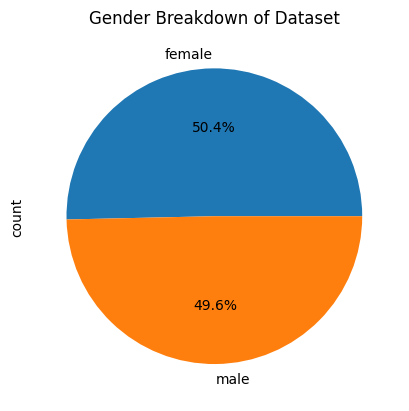

In [9]:
df['Gender'].value_counts().plot(kind = 'pie', title = 'Gender Breakdown of Dataset', autopct = "%1.1f%%")

* The distribution of the `Gender` column appears to very evenly distributed. 

In [10]:
df_male = df[df['Gender'] == 'male']
df_male.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
2,11179863,male,69,179,79,5,88,38.7,26
7,11117088,male,41,175,85,25,100,40.7,143
8,12132339,male,60,186,94,21,97,40.4,134
12,15566424,male,66,171,79,11,90,40.0,58


In [11]:
df_male.iloc[:,1:-1].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7447.0,42.844904,17.022752,20.0,28.0,39.0,56.0,79.0
Height,7447.0,184.667517,9.976179,142.0,178.0,185.0,191.0,222.0
Weight,7447.0,86.825702,10.180943,54.0,80.0,87.0,93.0,132.0
Duration,7447.0,15.559420,8.286255,1.0,8.0,15.0,23.0,30.0
Heart_Rate,7447.0,95.630052,9.564614,67.0,88.5,96.0,103.0,128.0
Body_Temp,7447.0,40.031153,0.773619,37.2,39.6,40.2,40.6,41.5


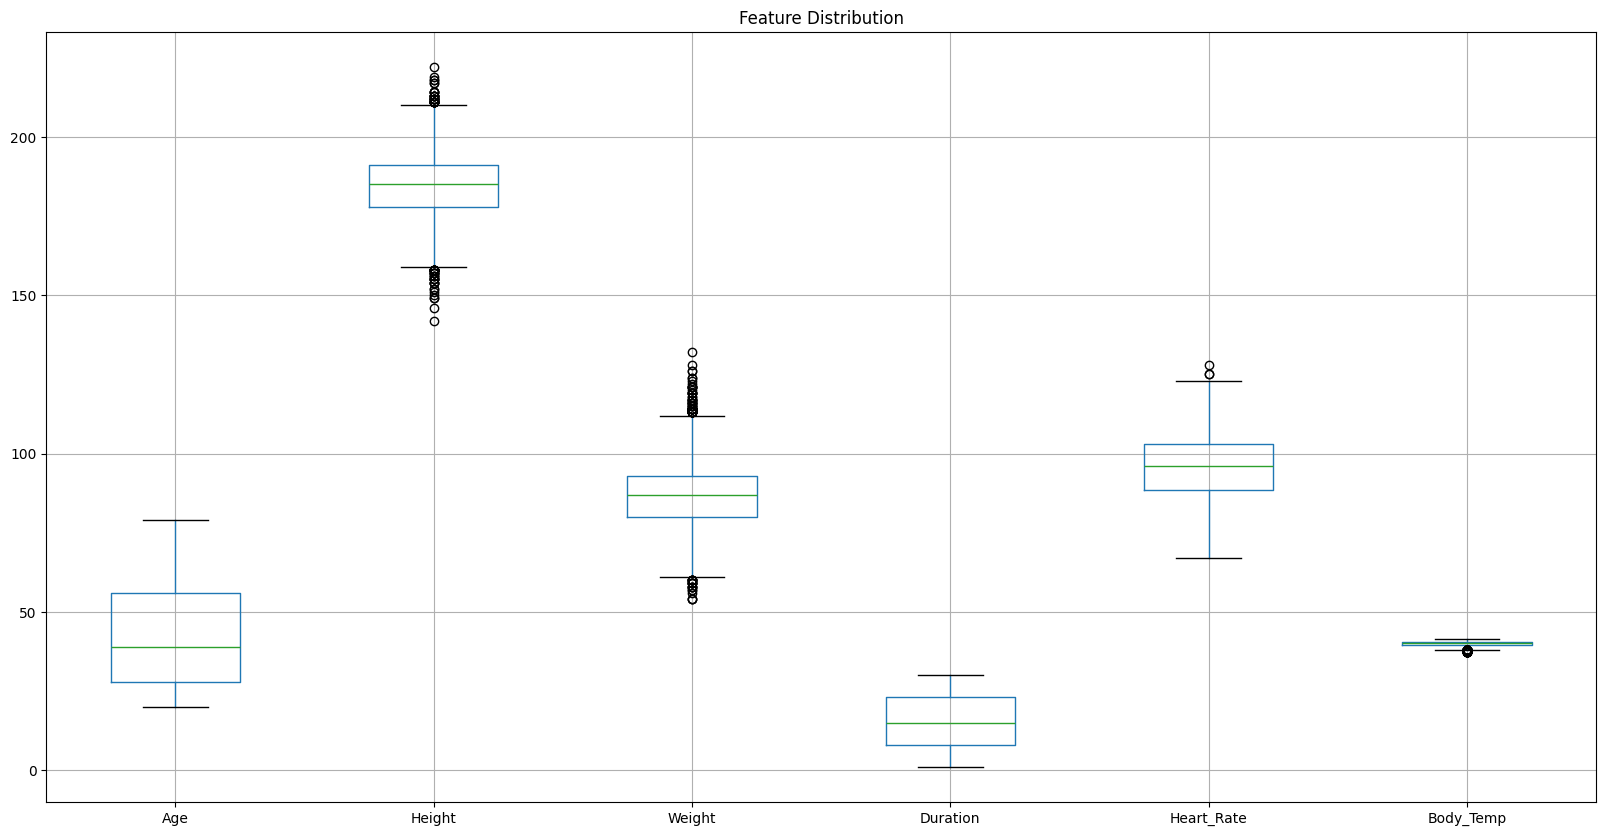

In [ ]:
bxplt = df_male.iloc[:,1:-1]
bxplt.boxplot(figsize = (20, 10))
plt.title("Feature Distribution for Male Participants")
plt.show()

In [25]:
df_male.loc[df['Height'] > 200]

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
89,19249559,male,25,202,100,9,94,39.8,39
95,12598637,male,40,201,98,24,110,40.7,179
100,16417986,male,74,201,107,14,96,40.1,101
124,15444304,male,67,201,96,18,105,40.5,143
178,12845462,male,36,202,109,6,87,39.1,24
...,...,...,...,...,...,...,...,...,...
14847,12808259,male,72,202,111,20,94,40.5,137
14872,14879685,male,25,201,101,15,93,40.0,64
14938,19509736,male,30,206,103,7,91,39.1,30
14960,14673359,male,23,202,107,5,83,39.0,14


In [27]:
df_male.loc[df['Height'] == df['Height'].max()]

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
10362,17352972,male,22,222,128,6,84,39.3,20


* Taking a look at the outliars for height in the dataset. These values aren't abnormal. Out of a pool of men you are going to have outliars cases on both ends of the spectrum and the regression model should have those points included in my opinion.

* The maximum value for height is a little bit on the tall side as less than 3000 people world wide are that height. I am still going to keep that value as it is only one value and it isn't impossible. 

In [30]:
df_female = df[df['Gender'] == 'female']
df_female.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
1,14861698,female,20,166,60,14,94,40.3,66
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
5,15130815,female,36,151,50,23,96,40.7,123
6,19602372,female,33,158,56,22,95,40.5,112


In [31]:
df_female.iloc[:,1:-1].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7553.0,42.735469,16.939220,20.0,28.0,40.0,56.0,79.0
Height,7553.0,164.405931,10.089177,123.0,158.0,164.0,171.0,205.0
Weight,7553.0,63.274460,8.449548,36.0,57.0,63.0,69.0,101.0
Duration,7553.0,15.502185,8.352013,1.0,8.0,16.0,23.0,30.0
Heart_Rate,7553.0,95.408579,9.601109,67.0,88.0,95.0,103.0,122.0
Body_Temp,7553.0,40.019833,0.784733,37.1,39.6,40.2,40.6,41.5


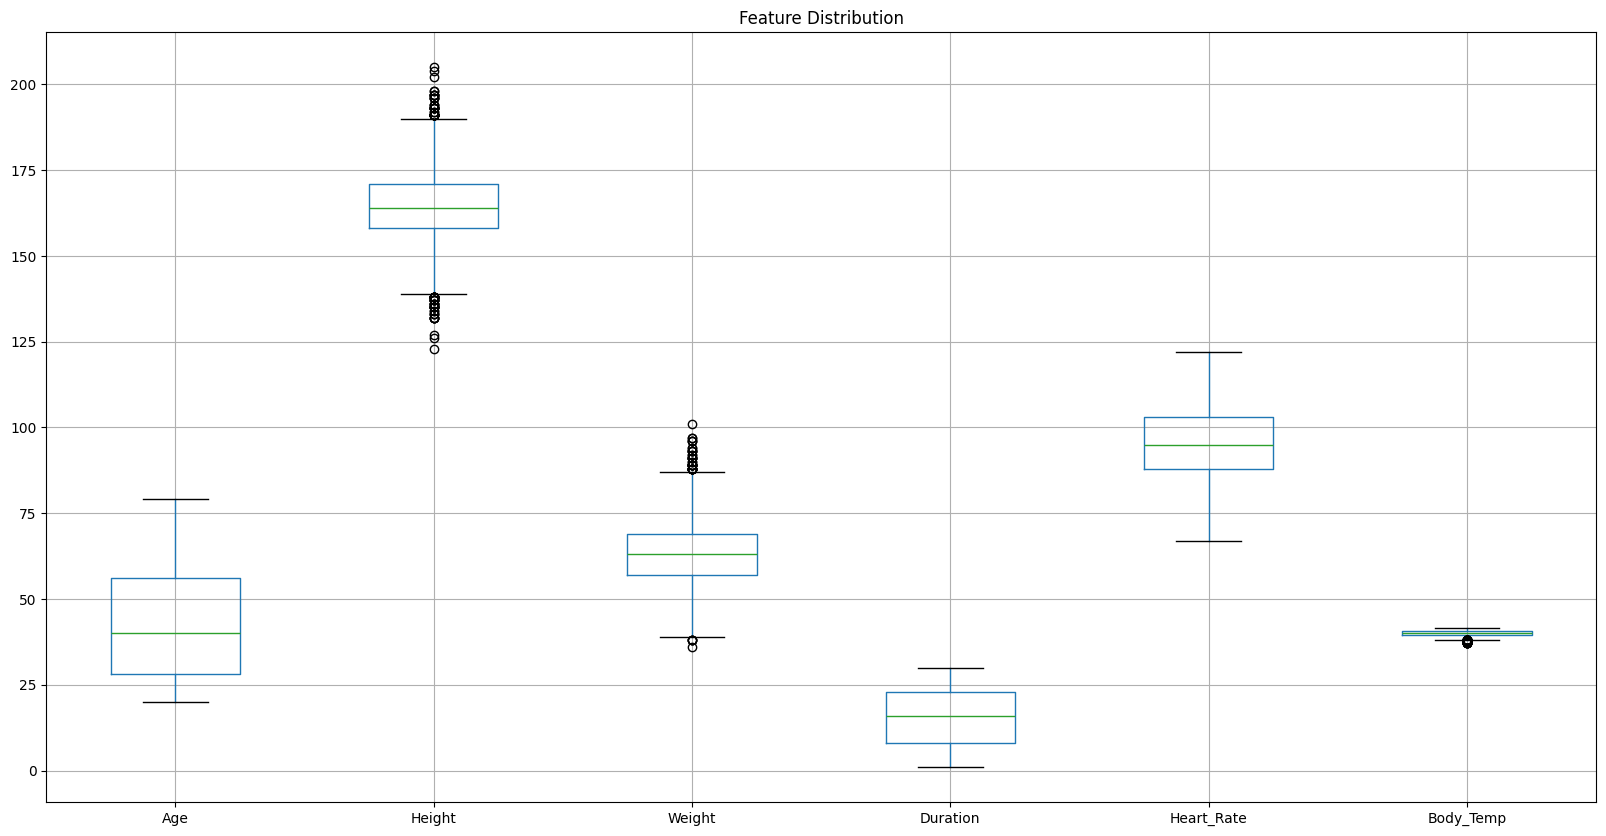

In [61]:
bxplt_F = df_female.iloc[:,1:-1]
bxplt_F.boxplot(figsize = (20, 10))
plt.title("Feature Distribution")
plt.show()

In [ ]:
df_female[df_female.Height == df_female.Height.max()]

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
5042,15805510,female,53,205,93,3,74,38.8,8


* The outliars on the positive side of the height column appear not to make sense. 
Let's take a look at how many women are taller than 200cm in the dataset.

In [36]:
df_female[df_female['Height'] >= 200]

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
5042,15805510,female,53,205,93,3,74,38.8,8
6951,16738965,female,31,204,101,6,84,39.3,20
14523,10356517,female,62,202,97,15,98,40.3,80


In [ ]:
#dropping outliar values as even though it is only 3 records could still affect model.
df_female[df_female['Height'] < 200]

In [9]:
#converting gender column to categorical then encoding cateogries to 0s and 1s
df['Gender'] = df['Gender'].astype('category').map({"male": 1 , 'female': 0})
df['Gender'].value_counts()


Gender
0    7553
1    7447
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   User_ID     15000 non-null  int64   
 1   Gender      15000 non-null  category
 2   Age         15000 non-null  int64   
 3   Height      15000 non-null  int64   
 4   Weight      15000 non-null  int64   
 5   Duration    15000 non-null  int64   
 6   Heart_Rate  15000 non-null  int64   
 7   Body_Temp   15000 non-null  float64 
 8   Calories    15000 non-null  int64   
dtypes: category(1), float64(1), int64(7)
memory usage: 952.4 KB


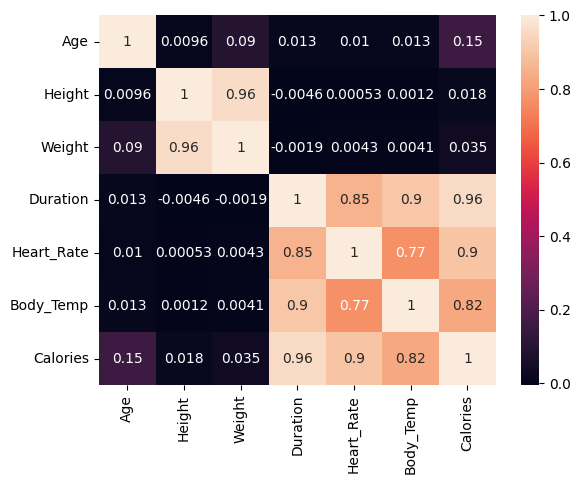

In [11]:
hm = df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']]
sns.heatmap(hm.corr(),annot = True )
plt.show()

#### Observations 

* Body Temperature , Heart Rate and Duration of workout had a very high correlation coefficient with calories burned.


## Seperating Features and Target Variable

In [12]:
X = df.drop(['User_ID','Calories'], axis = 1)
y = df['Calories']


In [13]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
std = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_train_sc= std
X_train_sc.head()



,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1.011398,1.142470,-0.170415,0.405758,-0.182779,-0.784549,0.610477
1,1.011398,2.028381,0.532036,0.538986,1.500617,1.308721,0.995151
2,-0.988730,1.792138,-0.310905,-0.260384,0.057706,-0.470558,0.225803
3,1.011398,1.969320,0.110566,0.405758,1.019647,-0.156568,0.866926
4,1.011398,-0.038744,0.602281,0.139301,-1.024476,-0.261231,-0.287095


In [14]:
Model = []
RMSE = []
R_sq = []
cv = KFold(5)


def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-cross_val_score(model, x, y, scoring = 'neg_mean_squared_error', cv = cv).mean())))
    R_sq.append(cross_val_score(model, x, y, scoring = 'r2', cv = cv).mean())


In [15]:
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']


models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

for name, model in zip(names, models):
    input_scores(name, model, X_train_sc, y_train)

evaluation = pd.DataFrame({'Model': Model, 'RMSE': RMSE, 'R Squared': R_sq})

print("Training scores below.Best model will be selected for hyperparameter tuning.")
evaluation

Training scores below.Best model will be selected for hyperparameter tuning.


,Model,RMSE,R Squared
0,Linear Regression,11.210435,0.967534
1,Ridge Regression,11.210429,0.967534
2,Lasso Regression,12.195827,0.961577
3,K Neighbors Regressor,5.381816,0.992507
4,Decision Tree Regressor,5.503499,0.991975
5,Random Forest Regressor,3.118362,0.997521
6,Gradient Boosting Regressor,3.703801,0.996458
7,Adaboost Regressor,11.572079,0.965230


In [16]:
best_model = evaluation.sort_values(by = ['RMSE', 'R Squared'], ascending = [True, False]).reset_index(drop = True).iloc[0]
best_model

Model        Random Forest Regressor
RMSE                        3.118362
R Squared                   0.997521
Name: 0, dtype: object

In [17]:
RandomForestRegressor()

RandomForestRegressor()

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [400, 500],
    'max_depth': [30, 40],
    'min_samples_split': [2, 5 ],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state = 1), param_grid, cv = cv, scoring = 'neg_mean_squared_error' , n_jobs= -1)
grid_search.fit(X_train_sc, y_train)

print('Best Parameters:', grid_search.best_params_)
print('-'*27)
print('Lowest RMSE:', np.sqrt(-grid_search.best_score_))

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
---------------------------
Lowest RMSE: 3.064220351465171


In [20]:
import joblib
filename = 'calories_burn_model.joblib'
joblib.dump(grid_search, filename, compress = 3)
print(f"Model saved as {filename}")

Model saved as calories_burn_model.joblib
